$H = \sum_{1\leq i < L/2-1, i > L/2+1}\left(c_i^{\dagger}c_{i+1} + \text{h.c.}\right) + J_0\left(c^{\dagger}_{L/2-1} c_{L/2} + c^{\dagger}_{L/2} c_{L/2+1} + \text{h.c.} \right)$

In [4]:
using LinearAlgebra
using SparseArrays
using ExponentialUtilities

In [5]:
# Create a free-fermion Hamiltonian with a weak-link at sites L/2-1, L/2 and L/2+1

function Hamiltonian(L::Int, Jimp::Float64)
    H = zeros(Complex{Float64}, L, L)
    for i in 1:(L ÷ 2 - 1)
        H[i, i + 1] = 1.0
        H[i + 1, i] = 1.0
    end
    for i in (L ÷ 2 + 1):L
        H[i, i - 1] = 1.0
        H[i - 1, i] = 1.0
    end
    H[L ÷ 2 - 1, L ÷ 2] = Jimp
    H[L ÷ 2, L ÷ 2 - 1] = Jimp
    H[L ÷ 2, L ÷ 2 + 1] = Jimp
    H[L ÷ 2 + 1, L ÷ 2] = Jimp
    return H
end

Hamiltonian (generic function with 1 method)

In [ ]:
L = 100
Jimp = 1.3
H = Hamiltonian(L, Jimp)

100×100 Matrix{ComplexF64}:
 0.0+0.0im  1.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 1.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  1.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
    ⋮                             ⋱                        
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0+0.0im  0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 0.0+0.0im  0.0

In [10]:
# Time-evolution of the Hamiltonian (ħ = 1)

function time_evolution(H, t::Float64)
    U = exp(-im * t * H)
    return U
end

time_evolution (generic function with 1 method)

In [12]:
t = 100.0
time_evolution(H, t)

100×100 Matrix{ComplexF64}:
  -0.278943+0.0im                0.0-0.0461293im  …         0.0-0.0166305im
        0.0-0.0461293im   -0.0674244+0.0im           -0.0860111+0.0im
   0.211519+0.0im                0.0+0.16001im              0.0-0.0256823im
        0.0+0.206139im    -0.0785313+0.0im           -0.0775585+0.0im
   -0.29005+0.0im                0.0+0.0112271im            0.0+0.00183495im
        0.0-0.194912im    -0.0330734+0.0im        …  -0.0125553+0.0im
   0.256977+0.0im                0.0-0.0622224im            0.0+0.00744596im
        0.0+0.13269im       0.114063+0.0im            0.0974747+0.0im
  -0.142914+0.0im                0.0-0.0304751im            0.0+0.0135758im
        0.0-0.163165im    -0.0700652+0.0im            0.0775099+0.0im
           ⋮                                      ⋱  
        0.0+0.0135758im     0.174985+0.0im            -0.214358+0.0im
  0.0974747+0.0im                0.0+0.0210218im            0.0+0.124107im
        0.0+0.00744596im   0.0849195+0.0i

In [32]:
# Half-filling state

initial_state = zeros(Complex{Float64}, 100)
for i in 1:49
    initial_state[i] = 1.0
end
initial_state = initial_state / norm(initial_state)

ErrorException: invalid redefinition of constant Main.initial_state

In [23]:
initial_state

100-element Vector{ComplexF64}:
 0.14285714285714285 + 0.0im
 0.14285714285714285 + 0.0im
 0.14285714285714285 + 0.0im
 0.14285714285714285 + 0.0im
 0.14285714285714285 + 0.0im
 0.14285714285714285 + 0.0im
 0.14285714285714285 + 0.0im
 0.14285714285714285 + 0.0im
 0.14285714285714285 + 0.0im
 0.14285714285714285 + 0.0im
                     ⋮
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im
                 0.0 + 0.0im

In [30]:
# Plot initial_state

using Plots
plot(real(initial_state), title="Initial State", xlabel="Site", ylabel="Amplitude", legend=:topright)
savefig("initial_state.png")

MethodError: MethodError: no method matching real(::typeof(initial_state))
The function `real` exists, but no method is defined for this combination of argument types.

Closest candidates are:
  real(!Matched::Type{Union{}}, Any...)
   @ Base complex.jl:123
  real(!Matched::Missing)
   @ Base missing.jl:101
  real(!Matched::Type{T}) where T<:Real
   @ Base complex.jl:121
  ...


In [25]:
state = initial_state
time_total = 100.0
Δ = 0.1  # Time step for evolution
time_steps = Int(time_total / Δ)
psi = zeros(Complex{Float64}, time_steps, length(initial_state))  # Rows = time steps
psi[1, :] = state  # Store initial state as first row
for t in 2:time_steps
    state = time_evolution(H, Δ) * state
    state = state / norm(state)
    psi[t, :] = state  # Store as row t
end

In [26]:
psi

1000×100 Matrix{ComplexF64}:
    0.142857+0.0im         …           0.0+0.0im
    0.141432-0.0142144im      2.51293e-102+3.027e-100im
      0.1372-0.0280038im       2.56984e-97+2.27836e-95im
    0.130286-0.0409573im       5.24087e-93+5.41528e-91im
    0.120898-0.0526917im       1.10938e-88+9.86606e-87im
    0.109314-0.0628644im   …   9.88008e-85+9.19109e-83im
   0.0958761-0.0711842im       8.90903e-81+7.6502e-79im
   0.0809793-0.0774211im       2.62065e-77+1.94464e-75im
   0.0650575-0.0814137im       2.70159e-74+1.75539e-72im
   0.0485695-0.0830739im        1.2302e-71+7.10546e-70im
            ⋮              ⋱  
 -0.00915072-0.00710121im       0.00992832-0.0222197im
 -0.00957787-0.00832708im       0.00768953-0.0229451im
  -0.0100592-0.00948904im       0.00532811-0.0231805im
  -0.0105997-0.010566im         0.00289407-0.0229289im
  -0.0112036-0.0115369im   …   0.000438199-0.0222035im
  -0.0118738-0.0123807im       -0.00198902-0.0210278im
  -0.0126124-0.0130777im       -0.00433835-0.01943

In [27]:
n_1 = sum(abs2, psi[1,:])

0.9999999999999999

In [28]:
Num = zeros(Float64, time_steps) 

for i in 1:time_steps
    Num[i] = sum(abs2, psi[i,49])
end


In [29]:
Num

1000-element Vector{Float64}:
 0.02040816326530612
 0.019865757393238603
 0.01831567514313693
 0.015976573954103946
 0.013172620873333322
 0.01028051422775893
 0.007668767746249524
 0.005639757853409691
 0.004384428409677542
 0.003957183507306246
 ⋮
 0.011997627714061196
 0.010699769341130455
 0.009131709068456674
 0.007567854299898117
 0.006276941215158016
 0.00547382754236858
 0.005281151536533774
 0.005707954566158506
 0.006649243328316084

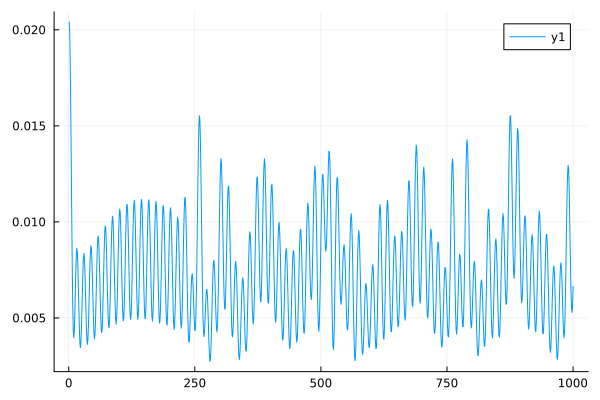

In [30]:
plot(Num)

In [19]:
op_current = zeros(ComplexF64, 100, 100)
for i in 1:49
    op_current[i, i] = 1.0
end

In [21]:
curr_t = zeros(Float64, time_steps) 

for i in 1:time_steps
    curr_t[i] = conj(psi[i, :])' * op_current * psi[i, :]
end

InexactError: InexactError: Float64(45.2330956100408 - 18.699828222665474im)

### Working code

In [1]:
using LinearAlgebra
using SparseArrays
using ExponentialUtilities
using Plots

In [2]:
## Construct the Hamiltonian

function Hamiltonian(L::Int, Jimp::Float64)
    H = zeros(Complex{Float64}, L, L)
    for i in 1:(L ÷ 2 - 1)
        H[i, i + 1] = 1.0
        H[i + 1, i] = 1.0
    end
    for i in (L ÷ 2 + 1):L
        H[i, i - 1] = 1.0
        H[i - 1, i] = 1.0
    end
    H[L ÷ 2 - 1, L ÷ 2] = Jimp
    H[L ÷ 2, L ÷ 2 - 1] = Jimp
    H[L ÷ 2, L ÷ 2 + 1] = Jimp
    H[L ÷ 2 + 1, L ÷ 2] = Jimp
    return H
end

## Time evolution operator

function time_evolution_op(H, t::Float64)
    U = exp(-im * t * H)
    return U
end

time_evolution_op (generic function with 1 method)

In [3]:
function initial_state(L::Int, defect_loc::Int)
    initial_state = zeros(Complex{Float64}, L)
    for i in 1:(defect_loc - 1)
        initial_state[i] = 1.0
    end
    initial_state = initial_state / norm(initial_state)
    return initial_state
end

initial_state (generic function with 1 method)

In [49]:
### Run this seperately

initial_state = zeros(Complex{Float64}, L)
for i in 1:49
    initial_state[i] = 1.0
end
initial_state = initial_state / norm(initial_state)

### Time evolution of the state

state = initial_state
time_total = 50.0
Δ = 0.1  # Time step for evolution
time_steps = Int(time_total / Δ)
psi = zeros(Complex{Float64}, time_steps, length(initial_state))  # Rows = time steps
psi[1, :] = state  # Store initial state as first row
for t in 2:time_steps
    state = time_evolution(H, Δ) * state
    state = state / norm(state)
    psi[t, :] = state  # Store as row t
end

In [4]:
function evolve_state(L::Int, Jimp::Float64, defect_loc::Int, T::Float64, Δ::Float64)

    # Build Hamiltonian and initial state
    H = Hamiltonian(L, Jimp)
    state = initial_state(L, defect_loc)

    # Time evolution setup
    time_steps = Int(floor(T / Δ)) + 1
    psi = zeros(ComplexF64, time_steps, L)
    psi[1, :] = state

    # Time evolution operator
    U = time_evolution_op(H, Δ)

    for t in 2:time_steps
        state = U * state
        state /= norm(state)
        psi[t, :] = state
    end

    return psi
end

evolve_state (generic function with 1 method)

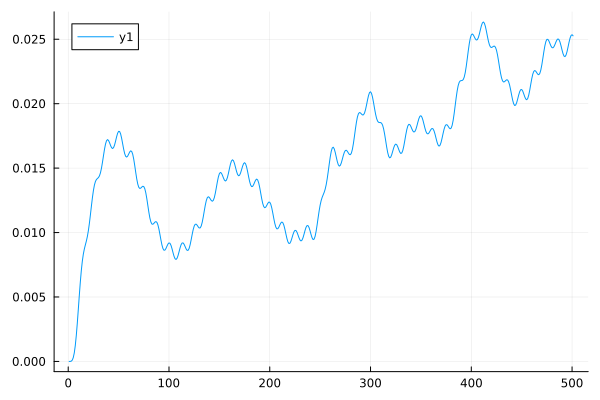

In [10]:
psi = evolve_state(100, 1.6, 49, 50.0, 0.1)
Num_n = zeros(Float64, 501) 

for i in 1:501
    Num_n[i] = sum(abs2, psi[i,50:100])
end

plot(Num_n)

In [50]:
Num = zeros(Float64, time_steps) 

for i in 1:time_steps
    Num[i] = sum(abs2, psi[i,50:100])
end

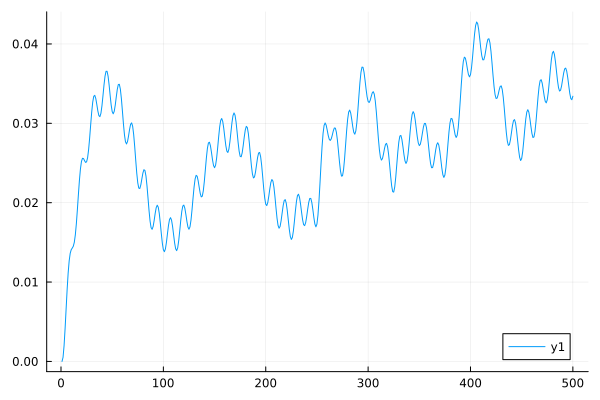

In [51]:
plot(Num)

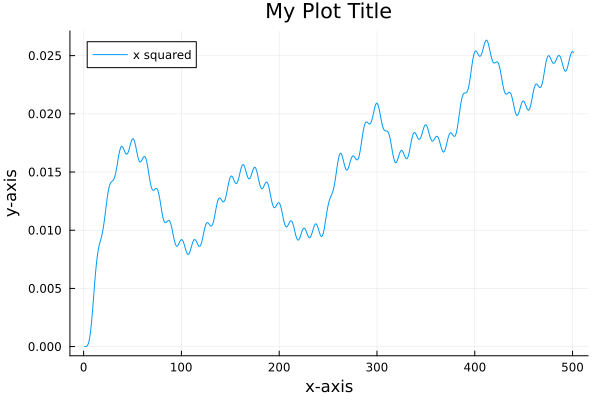

In [3]:
include("ff_wl.jl")

psi = evolve_state(100, 1.6, 49, 50.0, 0.1)
Num_n = zeros(Float64, 501) 

for i in 1:501
    Num_n[i] = sum(abs2, psi[i,50:100])
end

plot(Num_n, label="x squared", xlabel="x-axis", ylabel="y-axis", title="My Plot Title")

In [4]:
J_imp_arr = [0.2, 0.4, 0.6, 0.8, 1.0]

for J_imp in J_imp_arr
    psi = evolve_state(100, J_imp, 49, 50.0, 0.1)
    Num_n = zeros(Float64, 501) 

    for i in 1:501
        Num_n[i] = sum(abs2, psi[i,50:100])
    end

    plot!(Num_n, label="J_imp = $(J_imp)", xlabel="Time steps", ylabel="Defect current", title="Defect current vs Time steps")
end

In [62]:
include("ff_wl_inst.jl")

defect_bond_op (generic function with 1 method)

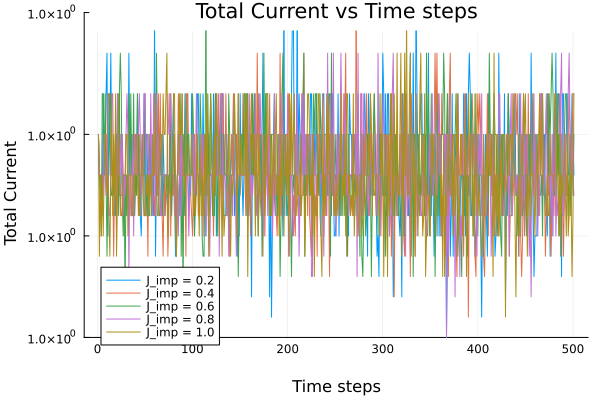

GKS: Possible loss of precision in routine SET_WINDOW


In [2]:
J_imp_arr = [0.2, 0.4, 0.6, 0.8, 1.0]

# Initialize the plot
plt = plot(xlabel="Time steps", ylabel="Total Current", title="Total Current vs Time steps")

for J_imp in J_imp_arr
    psi = evolve_state(100, J_imp, 49, 50.0, 0.1)
    Num_n = zeros(Float64, 501) 

    for i in 1:501
        Num_n[i] = sum(abs2, psi[i,:])
    end

    plot!(plt, Num_n, label="J_imp = $(J_imp)")
end

display(plt)

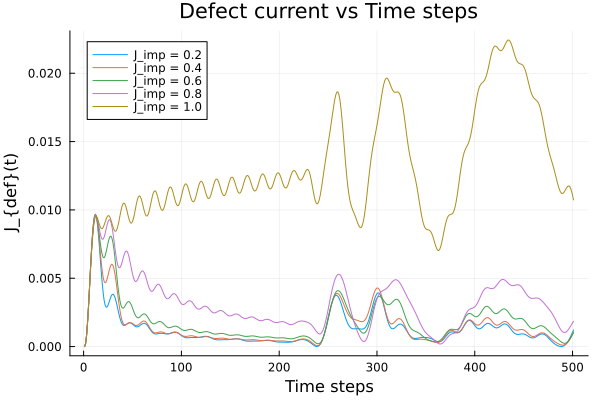

In [ ]:
J_imp_arr = [0.5]

# Initialize the plot
plt = plot(xlabel="Time steps", ylabel="J_{def}(t)", title="Defect current vs Time steps")

for J_imp in J_imp_arr
    psi = evolve_state(100, J_imp, 49, 50.0, 0.1)
    Num_n = zeros(Float64, 501) 

    for i in 1:501
        Num_n[i] = sum(abs2, psi[i,49:51])
    end

    plot!(plt, Num_n, label="J_imp = $(J_imp)")
end

display(plt)
#savefig("j_vs_t_1_defect.png")

In [ ]:
function defect_bond_op(L::Int, J_imp::Float64)
    op = zeros(Complex{Float64}, L, L)

    for i in L/2-1:L/2+1
        op[i, i+1] = 1.0 * im * J_imp
        op[i+1, i] = -1.0 * im * J_imp
    end
    return op
end

In [76]:
include("ff_wl_inst.jl")

defect_bond_op (generic function with 1 method)

In [78]:
J_imp_arr = [1.2, 1.4, 1.6, 1.8, 2.0]

# Initialize the plot
plt = plot(xlabel="Time steps", ylabel="J_{def}(t)", title="Defect current vs Time steps")

for J_imp in J_imp_arr
    psi = evolve_state(100, J_imp, 49, 50.0)
    Num_n = zeros(Float64, 501) 

    for i in 1:501
        Num_n[i] = sum(abs2, psi[i,49:51])
    end

    plot!(plt, Num_n, label="J_imp = $(J_imp)")
end

display(plt)
savefig("j_vs_t_2_efect.png")

BoundsError: BoundsError: attempt to access 501-element Vector{Any} at index [1, 49:51]

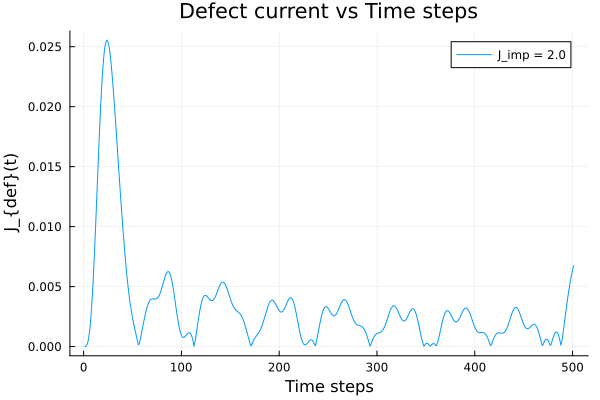

In [66]:
J_imp_arr = [2.0]

# Initialize the plot
plt = plot(xlabel="Time steps", ylabel="J_{def}(t)", title="Defect current vs Time steps")

for J_imp in J_imp_arr
    psi = evolve_state(100, J_imp, 49, 50.0, 0.1)
    Num_n = zeros(Float64, 501) 

    for i in 1:501
        Num_n[i] = abs(psi[i,:]' * defect_bond_op(100, J_imp) * psi[i,:])
    end

    plot!(plt, Num_n, label="J_imp = $(J_imp)")
end

display(plt)

In [49]:
function time_evolution_op(H, t::Float64)
    eig = eigen(H)
    V = eig.vectors
    D = Diagonal(exp.(-im * t * eig.values))
    U = V * D * V'
end

time_evolution_op (generic function with 1 method)

In [ ]:
J_imp_arr = [0.2, 0.4, 0.6, 0.8, 1.0]

# Initialize the plot
plt = plot(xlabel="Time steps", ylabel="Total Current", title="Total Current vs Time steps")

for J_imp in J_imp_arr
    psi = evolve_state(100, J_imp, 49, 50.0, 0.1)
    Num_n = zeros(Float64, 501) 

    for i in 1:501
        Num_n[i] = sum(abs2, psi[i,:])
    end

    plot!(plt, Num_n, label="J_imp = $(J_imp)")
end

display(plt)

In [3]:
psi = evolve_state(100, 0.3, 49, 50.0, 0.1)
    Num_n = zeros(Float64, 501) 

    for i in 1:501
        Num_n[i] = sum(abs2, psi[i,:])
    end

In [4]:
Num_n

501-element Vector{Float64}:
 1.0000000000000002
 0.9999999999999998
 0.9999999999999998
 1.0
 1.0000000000000002
 1.0000000000000002
 1.0000000000000002
 0.9999999999999997
 1.0000000000000002
 1.0
 ⋮
 1.0000000000000004
 1.0000000000000007
 0.9999999999999998
 0.9999999999999999
 0.9999999999999994
 0.9999999999999998
 1.0000000000000004
 1.0000000000000002
 1.0000000000000002

### Thermodynamics

In [1]:
using LinearAlgebra
using SparseArrays
using ExponentialUtilities
using Plots

In [6]:
function hamiltonian(L::Int, J::Float64, J_imp::Float64)
    center = L ÷ 2
    H = zeros(Complex{Float64}, L, L)
    for i in 1:L-1
        if i == center - 1 || i == center
            bond = J_imp
        else
            bond = J
        end
        H[i, i+1] = bond/2
        H[i+1, i] = bond/2
    end
    return H
end

hamiltonian (generic function with 1 method)

In [10]:
h = hamiltonian(100, 1.0, 0.5)
evals = eigen(h).values;
evecs = eigen(h).vectors;


In [46]:
evals

100-element Vector{Float64}:
 -0.9981176663725945
 -0.9980377122957996
 -0.9924779393754766
 -0.9921587079446708
 -0.9831026172277538
 -0.9823865363854307
 -0.9700279524857505
 -0.9687603575877759
 -0.9533045364342498
 -0.9513348098035515
  ⋮
  0.9533045364342501
  0.9687603575877762
  0.970027952485751
  0.9823865363854313
  0.9831026172277537
  0.9921587079446714
  0.9924779393754762
  0.9980377122958001
  0.998117666372594

In [ ]:
function time_evolution_op(H, t::Float64)
    evals = eigen(h).values
    evecs = eigen(h).vectors
    U_t = evecs * Diagonal(exp.(-im * evals * t)) * evecs'
    return U_t
end

In [17]:
t = 1.0
U = evecs * Diagonal(exp.(-im * evals * t)) * evecs'

100×100 Matrix{ComplexF64}:
     0.880101-5.85028e-16im  …    1.0201e-15+8.7527e-16im
  5.28825e-19-0.459614im        -1.36089e-15-1.62328e-15im
     -0.11738-6.94323e-16im       1.4057e-15+1.31613e-15im
  6.45101e-16+0.0198131im       -5.36963e-16-1.06751e-15im
   0.00249758-4.15619e-16im     -8.35651e-18+6.17853e-16im
 -3.45105e-16-0.00025126im   …  -2.66312e-16-3.26539e-16im
  -2.10326e-5+5.28729e-16im      3.34014e-16+2.44848e-16im
 -4.97534e-16+1.50758e-6im      -9.78843e-17+1.72231e-17im
   9.44865e-8+2.94408e-16im     -7.17234e-17-1.53686e-16im
  5.30355e-18-5.26123e-9im       2.98424e-16+5.31956e-16im
             ⋮               ⋱  
 -2.37296e-16-2.11565e-16im       9.44865e-8-2.2506e-16im
 -2.34429e-16-7.12388e-17im      1.23402e-16+1.50758e-6im
  3.79369e-16+3.18148e-16im      -2.10326e-5-3.60602e-16im
 -1.88297e-16-4.16535e-16im      4.36186e-16-0.00025126im
  4.99352e-17+7.19281e-16im  …    0.00249758-2.1443e-16im
 -6.89601e-16-1.24413e-15im     -1.40895e-17+0.0198131im
  

In [30]:
L, J, J_imp = 100, 1.0, 0.5
mu_L, mu_R = 1.0, -1.0
t_steady = 50.0
j0 = L ÷ 2 - 1
function initial_correlation_matrix(evecs, evals, mu_L, mu_R, beta=1e6)
    L = size(evecs, 1)
    fL = 1 ./ (1 .+ exp.(beta .* (evals .- mu_L)))
    fR = 1 ./ (1 .+ exp.(beta .* (evals .- mu_R)))
    CL = evecs * Diagonal(fL) * evecs'
    CR = evecs * Diagonal(fR) * evecs'
    C0 = zeros(Complex{Float64}, L, L)
    C0[1:j0+1, 1:j0+1] = CL[1:j0+1, 1:j0+1]
    C0[j0+1:end, j0+1:end] = CR[j0+1:end, j0+1:end]
    return C0
end

initial_correlation_matrix (generic function with 3 methods)

In [31]:
C0 = initial_correlation_matrix(evecs, evals, mu_L, mu_R)

100×100 Matrix{ComplexF64}:
          1.0+0.0im   8.85959e-16+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
  8.85959e-16+0.0im           1.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -6.96671e-16+0.0im   1.71042e-15+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
  1.05155e-15+0.0im  -1.53381e-15+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -8.52861e-16+0.0im   8.62204e-16+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -4.11945e-16+0.0im   5.30182e-16+0.0im  …  0.0+0.0im  0.0+0.0im  0.0+0.0im
   1.3218e-15+0.0im  -1.08668e-15+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
 -6.76891e-16+0.0im   1.12929e-15+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
  2.36438e-16+0.0im  -6.99551e-16+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
  3.19631e-17+0.0im   1.94071e-16+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
             ⋮                           ⋱                        
          0.0+0.0im           0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0+0.0im
          0.0+0.0im           0.0+0.0im     0.0+0.0im  0.0+0.0im  0.0

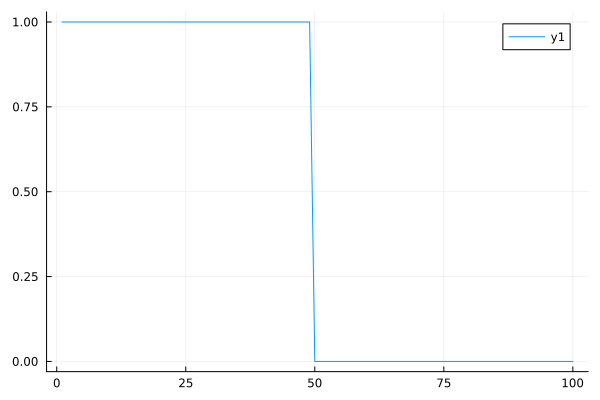

In [32]:
n_init = real(diag(C0))
plot(n_init)

In [41]:
function initial_correlation_matrix(evecs, evals, mu_L, mu_R, beta=1e6)
    L = size(evecs, 1)
    fL = 1 .- 0 .* evals
    fR = 0 .* evals
    CL = evecs * Diagonal(fL) * evecs'
    CR = evecs * Diagonal(fR) * evecs'
    C0 = zeros(Complex{Float64}, L, L)
    C0[1:j0+1, 1:j0+1] = CL[1:j0+1, 1:j0+1]
    C0[j0+1:end, j0+1:end] = CR[j0+1:end, j0+1:end]
    return C0
end

initial_correlation_matrix (generic function with 3 methods)

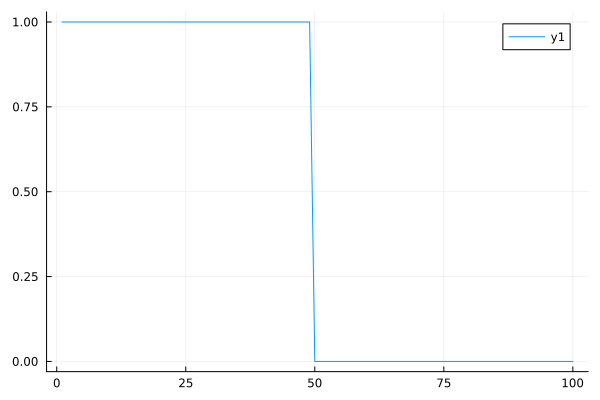

In [42]:
C0 = initial_correlation_matrix(evecs, evals, mu_L, mu_R)
n_init = real(diag(C0))
plot(n_init)

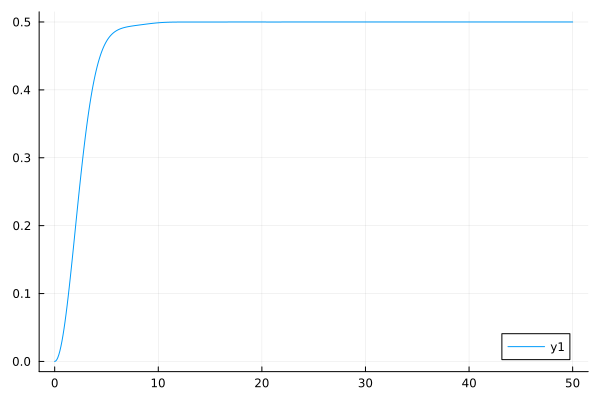

In [82]:
times = 0:0.1:50
currents = []
for t in times
    U_t = evecs * Diagonal(exp.(-im * evals * t)) * evecs'
    C_t = U_t * C0 * U_t'
    push!(currents, real(C_t[j0+1, j0+1]))
end
plot(times, currents)

In [58]:
beta = 1e6
fL =(evals .- mu_L)
#CR = evecs * Diagonal(fR) * evecs'

100-element Vector{Float64}:
 -1.9981176663725946
 -1.9980377122957997
 -1.9924779393754766
 -1.9921587079446708
 -1.983102617227754
 -1.9823865363854307
 -1.9700279524857505
 -1.968760357587776
 -1.9533045364342498
 -1.9513348098035515
  ⋮
 -0.04669546356574994
 -0.031239642412223767
 -0.02997204751424898
 -0.017613463614568725
 -0.016897382772246283
 -0.007841292055328575
 -0.007522060624523763
 -0.0019622877041999276
 -0.0018823336274059743

In [59]:
evals

100-element Vector{Float64}:
 -0.9981176663725945
 -0.9980377122957996
 -0.9924779393754766
 -0.9921587079446708
 -0.9831026172277538
 -0.9823865363854307
 -0.9700279524857505
 -0.9687603575877759
 -0.9533045364342498
 -0.9513348098035515
  ⋮
  0.9533045364342501
  0.9687603575877762
  0.970027952485751
  0.9823865363854313
  0.9831026172277537
  0.9921587079446714
  0.9924779393754762
  0.9980377122958001
  0.998117666372594

In [67]:
function initial_correlation_matrix(evecs, L::Int, j0::Int)
    CL = evecs * Diagonal(1.0) * evecs'
    CR = evecs * Diagonal(0.0) * evecs'
    C0 = zeros(Complex{Float64}, L, L)
    C0[1:j0+1, 1:j0+1] = CL[1:j0+1, 1:j0+1]
    C0[j0+1:end, j0+1:end] = CR[j0+1:end, j0+1:end]
    return C0
end

initial_correlation_matrix (generic function with 4 methods)

Correlation matrix code

In [1]:
include("ff_wl_dyn.jl")

"times = 0:0.1:T_steady\ncurrent = []\nl = 50 ### site of interest\nfor t in times\n    U_t = evecs * Diagonal(exp.(-im * evals * t)) * evecs'\n    C_t = U_t * C0 * U_t'\n    push!(current, 2 * J_imp * imag(C_t[l, l+1]))\nend\n"

In [2]:
H = hamiltonian(100, 1.0, 0.5);

In [3]:
C0 = initial_correlation_matrix(H, 1.0, -1.0, 100);

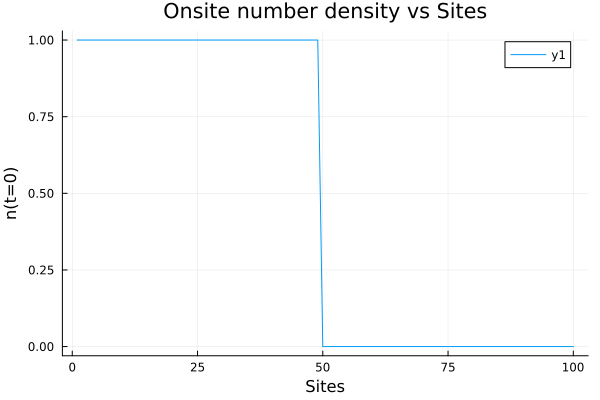

In [4]:
plt = plot(xlabel="Sites", ylabel="n(t=0)", title="Onsite number density vs Sites")
plot!(plt, real(diag(C0)))

In [9]:
T_steady = 50.0
times = 0:0.1:T_steady
onsite_occupations = []
l = 1 ### site of interest
evecs = eigen(H).vectors
evals = eigen(H).values
for t in times
    U_t = evecs * Diagonal(exp.(-im * evals * t)) * evecs'
    C_t = U_t * C0 * U_t'
    push!(onsite_occupations, real(C_t[l, l]))
end

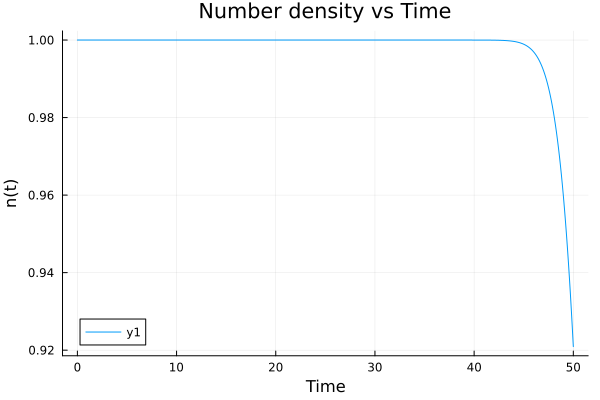

In [10]:
plt = plot(xlabel="Time", ylabel="n(t)", title="Number density vs Time")
plot!(plt, times, onsite_occupations)